# Assembly Viewer
Demonstrates how to parse the `assembly.json` file to construct a graph and visualize the assembly

In [3]:
from pathlib import Path
import networkx as nx
import numpy as np
import trimesh
import meshplot as mp

from assembly_graph import AssemblyGraph

## Parse the Assembly into a Graph

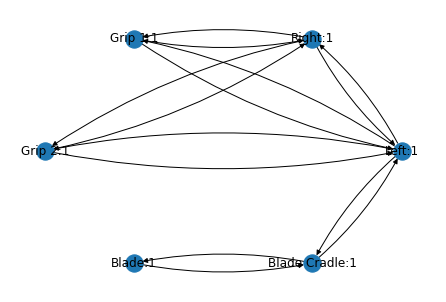

In [4]:
assembly_dir = Path("path/to/a1.0.0/assembly")
assembly_file = assembly_dir / "7780_6c885e81/assembly.json"

ag = AssemblyGraph(assembly_file)
graph = ag.get_graph_networkx()

label_dict = ag.get_node_label_dict()
nx.draw_circular(graph, connectionstyle="arc3, rad = 0.1", labels=label_dict, with_labels=True)

## View the Assembly

In [5]:
# Concat all the vertices and faces together as lists
vertices_list = []
faces_list = []
face_offset = 0
for index, (node_key, node_data) in enumerate(graph.nodes.data()):
    node_obj_file = assembly_file.parent / f"{node_data['body_file']}.obj"
    mesh = trimesh.load(node_obj_file)
    f = mesh.faces
    v = mesh.vertices
    faces_list.append(f + face_offset)
    v = np.pad(v.T, ((0, 1), (0, 0)), mode="constant", constant_values=1)
    transform = np.array(node_data["transform"])
    v = transform @ v
    vertices_list.append(v.T)
    face_offset += v.shape[1]
    
vertices = np.concatenate(vertices_list)
faces = np.concatenate(faces_list)
# Show the combined mesh
mp.plot(vertices[:,0:3], faces)

Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(-6.794929…